# Variance estimator

We show using simulations that the estimator $s^2(a)=\frac{\sum_{i=i}^n (x_i - \hat{\mu})^2}{n-a}$ has ME  $E(s^2(a))=\frac{n-1}{n-a}\sigma^2$. Hence, for $a=1$ the estimator is unbiased.

The green line is indicating true variance, red is the mean of the variance estimator samples.

In [1]:
import ipywidgets as widgets
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np

def Estimacija_varijanse(n,df):
# n: number of samples from which we obtain one sample of the variance estimator
# s: number of experiments - number of samples of the variance estimator
# df: estimator type (parameter a)
#     df=0: division by n - biased
#     df=1: division by n-1 : unbiased
# ...

    if n>df:
        s = 100000
        X = np.random.normal(0,1,[n,s])  # samples from normal distribution
        V = np.var(X,axis=0,ddof=df)
        v = np.mean(V)

        plt.plot([v,v], [0, 3], 'r--', linewidth = 2.0)
        plt.hist(V,bins=60,density=True);

        plt.plot([1,1], [0, 3], 'g:', linewidth = 2.0)
        plt.ylabel('Histogram', fontsize = 15)
        plt.grid()
        plt.xlim([0,4])
        plt.show()

In [2]:
widgets.interact(
    Estimacija_varijanse,
    n = widgets.IntSlider(min=2, max=100,description='n=', step=1, value=2), df=widgets.IntSlider(min=0, max=5,description='df=', step=1, value=0))

interactive(children=(IntSlider(value=2, description='n=', min=2), IntSlider(value=0, description='df=', max=5…

<function __main__.Estimacija_varijanse(n, df)>

## Estimator of standard deviation:  $s(a)=\sqrt{\frac{\sum_{i=i}^n (x_i - \hat{\mu})^2}{n-a}}$. It is not unbiased even for $a=-1$ although the variance estimator is!

In [4]:
def std_estimator(n,df):

    if n>df:
        s = 100000
        X = np.random.normal(0,1,[n,s])
        V = np.std(X,axis=0,ddof=df)
        v = np.mean(V)

        plt.plot([v,v], [0, 3], 'r--', linewidth = 2.0)
        plt.hist(V,bins=60,density=1);

        plt.plot([1,1], [0, 3], 'g:', linewidth = 2.0)
        plt.ylabel('Histogram', fontsize = 15)
        plt.grid()
        plt.xlim([0,4])
        plt.show()

In [5]:
widgets.interact(
    std_estimator,
    n = widgets.IntSlider(min=2, max=100,description='n=', step=1, value=2), df=widgets.IntSlider(min=0, max=5,description='df=', step=1, value=0))

interactive(children=(IntSlider(value=2, description='n=', min=2), IntSlider(value=0, description='df=', max=5…

<function __main__.std_estimator(n, df)>

## Convergence (consistency, stability) of the variance estimator

In [6]:
def var_estimator(m,sigma,n,r,df):
# n: number of samples
# r: number of experiments


    for i in range(r):
        v=[]
        y = np.random.normal(m, sigma, n)
        for k in range(n):
            v=np.append(v,np.var(y[0:k], ddof=df))   # sequence of variance estimators
        plt.plot(range(1,n+1), v)


    plt.gcf().set_size_inches(10,5)
    plt.grid()
    plt.show()

In [7]:
widgets.interact(var_estimator,
                 m=widgets.FloatSlider(min=-5, max=5,description='Sr.vr.', step=0.5, value=0),
                 sigma=widgets.FloatSlider(min=0.1, max=10,description='Standardna devijacija', step=1, value=1),
                 n=widgets.IntSlider(min=10, max=1000,description='broj uzoraka', step=10, value=100),
                 r=widgets.IntSlider(min=1, max=10,description='broj eksperimenata', step=1, value=5),
                 df=widgets.IntSlider(min=0, max=5,description='df=', step=1, value=0)
)

interactive(children=(FloatSlider(value=0.0, description='Sr.vr.', max=5.0, min=-5.0, step=0.5), FloatSlider(v…

<function __main__.var_estimator(m, sigma, n, r, df)>

### Exercise: plot similar curves for other distributions: e.g. Bernoulli, exponential, uniform, Poisson...

# Confidence intervals for the variance

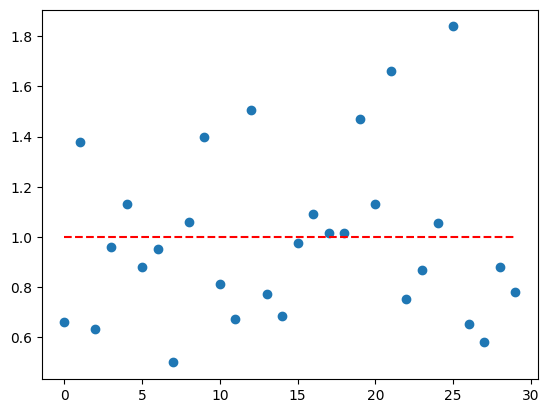

In [14]:
## for RV with normal distrinbution with ME m, and standard deviation std

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

m=0
var=1
std=var**0.5

number_of_samples = 20 # for one variance estiamtor
number_of_var_samples=30 # number of samples of the variance estiamtor


normRV= stats.norm(m,std)
xs = normRV.rvs(number_of_samples*number_of_var_samples).reshape(number_of_samples,-1)
samples_Var = np.var(xs,axis=0,ddof=1) # samples of unbiased estimators
plt.scatter(np.arange(len(samples_Var)),samples_Var)
plt.plot([var]*number_of_var_samples,'r--')  # true variance - red line
plt.show()

In [15]:
# Confidence interval based on the first sample of size number_of_samples:

alpha=0.05   # confidence level is 1-alpha=0.95

print(samples_Var[0])


Kvantil1 = stats.chi2.ppf(1-alpha/2, df=number_of_samples-1)  # Quantile of appropriate order of the hi-squared distribution with n-1 ddof
Kvantil2 = stats.chi2.ppf(alpha/2, df=number_of_samples-1)  # Second quantile of appropriate order of the hi-squared distribution with n-1 ddof


CI = ((number_of_samples-1)*samples_Var[0]/Kvantil1, (number_of_samples-1)*samples_Var[0]/Kvantil2)
print(CI)

# If the number of samples is large enough, we can also use quantiles of normal distribution:
Kvantil1_n = stats.norm.ppf(1-alpha/2, loc=number_of_samples-1, scale=(2*(number_of_samples-1))**0.5)  # Quantile of normal (n-1,2(n-1)) distribution
Kvantil2_n = stats.norm.ppf(alpha/2, loc=number_of_samples-1, scale=(2*(number_of_samples-1))**0.5)

CI1 = ((number_of_samples-1)*samples_Var[0]/Kvantil1_n, (number_of_samples-1)*samples_Var[0]/Kvantil2_n)
print(CI1)

0.6598631947764044
(0.3816290016083075, 1.4076660303842254)
(0.40336493240688703, 1.8122945995238555)


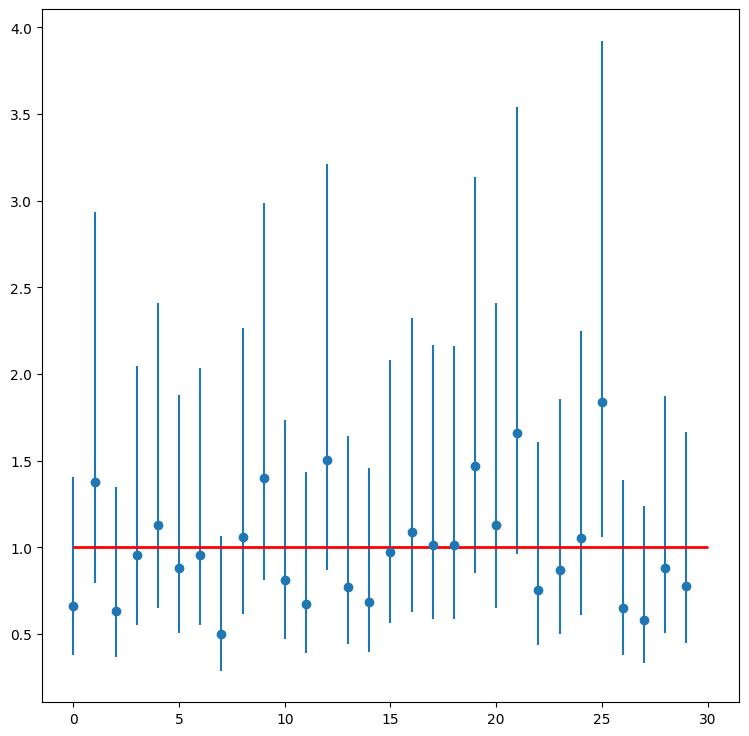

In [16]:
# For each point estimator we get one confidence interval:

CIs=[]
for i in range(0,number_of_var_samples):
    CIs.append(((number_of_samples-1)*samples_Var[i]/Kvantil1, (number_of_samples-1)*samples_Var[i]/Kvantil2))

# plotting:

plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0, number_of_var_samples),
             y=samples_Var[0:number_of_var_samples],
             yerr=np.stack((samples_Var-np.array(CIs)[:,0], np.array(CIs)[:,1]-samples_Var)),
             fmt='o')

plt.hlines(xmin=0, xmax=number_of_var_samples,
           y=var,
           linewidth=2.0,
           color="red")

plt.show()

In [17]:
# CIs for variance are not symmetric!!

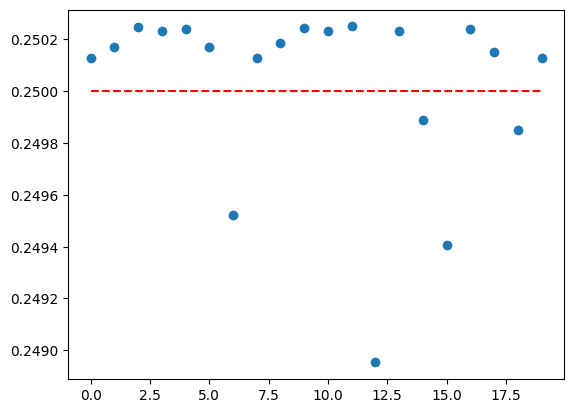

In [20]:
## For Bernoulli RV we will show that CIs do not hold (they hold only for samples from normal distribution)


from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

p=0.5
var=p*(1-p)
std=var**0.5

num_samples = 1000 # number of samples for calculating one variance score
num_samples_var = 20 # number of sample variance estimates


b= stats.bernoulli(p) # probability of success is p
xs = b.rvs(num_samples*num_samples_var).reshape(num_samples,-1)
sample_var = np.var(xs,axis=0,ddof=1) # samples of unbiased estimators
plt.scatter(np.arange(len(sample_var)), sample_var)
plt.plot([var]*num_samples_var,'r--')  # true variance (red line)
plt.show()

In [21]:
# determining the confidence interval for the first estimate samples_var[0]:

alpha=0.05   # confidence interval 1-alpha=0.95

print(sample_var[0])  # stampamo estimiranu vrednost


quantile1 = stats.chi2.ppf(1-alpha/2, df=num_samples-1)  # Quantile of the corresponding order chi square distribution with n-1 degrees of freedom
quantile2 = stats.chi2.ppf(alpha/2, df=num_samples-1)    # Quantile of the corresponding order chi square distribution with n-1 degrees of freedom


conf_interval = ((num_samples-1)*sample_var[0]/quantile1, (num_samples-1)*sample_var[0]/quantile2)
print(conf_interval)

# Since the number of samples is large enough, the normal distribution can also be used:
quantile1_n = stats.norm.ppf(1-alpha/2, loc=num_samples-1, scale=(2*(num_samples-1))**0.5)  # Quantile of the corresponding order of the normal (n-1,2(n-1)) distribution
quantile2_n = stats.norm.ppf(alpha/2, loc=num_samples-1, scale=(2*(num_samples-1))**0.5)

conf_interval1 = ((num_samples-1)*sample_var[0]/quantile1_n, (num_samples-1)*sample_var[0]/quantile2_n)
print(conf_interval1)

0.25012912912913254
(0.22956542839048152, 0.27359983232750745)
(0.22996232690439444, 0.27417303895750234)


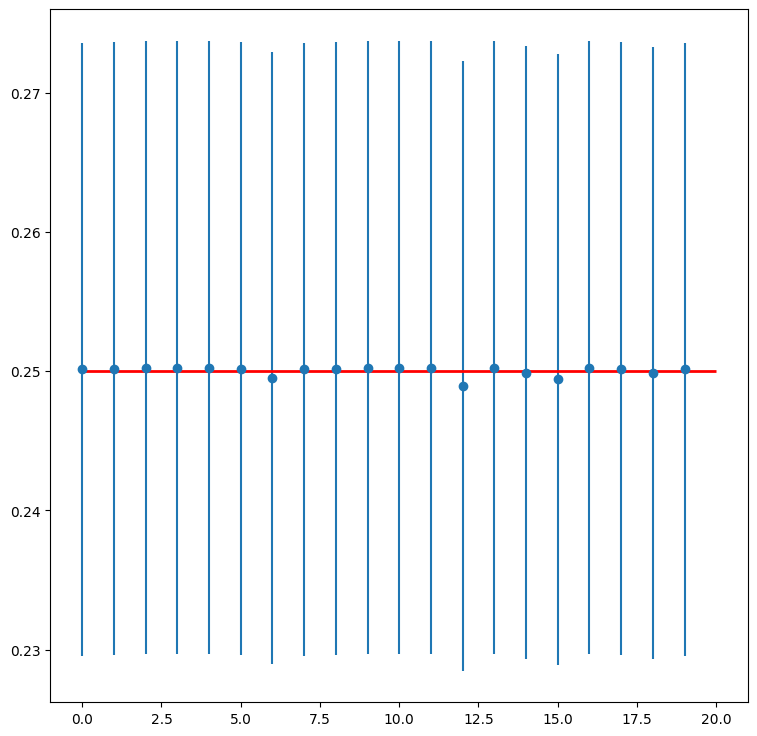

In [22]:
ci=[]
for i in range(0,num_samples_var):
    ci.append(((num_samples-1)*sample_var[i]/quantile1, (num_samples-1)*sample_var[i]/quantile2))

# crtanje intervala poverenja:

plt.figure(figsize=(9,9))

# crtamo intervale pomocu plt.errorbar:
plt.errorbar(x=np.arange(0, num_samples_var),
             y=sample_var[0:num_samples_var],
             yerr=np.stack((sample_var-np.array(ci)[:,0], np.array(ci)[:,1]-sample_var)),
             fmt='o')

plt.hlines(xmin=0, xmax=num_samples_var,
           y=var,
           linewidth=2.0,
           color="red")

plt.show()

In [24]:
# Confidence intervals are too wide (independent of n)
# For a small value of the probability of success p, too narrow confidence intervals are obtained.

# the problem is in calculating the variance of the squared normalized SP:
# For p=0.5, the variance is 0 (and the first term of the formula for confidence intervals should be 2!):
np.var((xs-p)**2/(p*(1-p)),axis=0,ddof=1)

array([6.60698229, 6.15133652, 7.4326178 , 7.74305169, 6.86387128,
       6.79988631, 6.4775887 , 7.68128128, 6.99136668, 8.23152041,
       6.86387128, 7.4326178 , 6.79988631, 8.35205576, 6.28231194,
       6.28231194, 7.74305169, 7.24445927, 6.99136668, 7.92741383])

In [25]:
# For p=0.1 the variance is much larger than 2:
p=0.1
b= stats.bernoulli(p)
xs = b.rvs(num_samples*num_samples_var).reshape(num_samples,-1)
np.var((xs-p)**2/(p*(1-p)),axis=0,ddof=1)

array([6.34756238, 6.73574315, 6.28231194, 6.4775887 , 6.79988631,
       6.15133652, 6.60698229, 6.60698229, 6.08561154, 7.11822934,
       7.4326178 , 7.37005648, 6.92769807, 7.24445927, 7.11822934,
       6.67144181, 6.92769807, 6.60698229, 7.11822934, 7.98855151])

In [26]:
# For p around 0.21, the variance is around 2, so the intervals are:
p=0.21
b= stats.bernoulli(p)
xs = b.rvs(num_samples*num_samples_var).reshape(num_samples,-1)
np.var((xs-p)**2/(p*(1-p)),axis=0,ddof=1)

array([2.12670605, 2.01551597, 2.10633507, 2.00117676, 2.03684127,
       2.06493242, 1.98673966, 2.02264887, 1.95021871, 1.97948441,
       2.07189404, 2.00117676, 2.00117676, 1.89806166, 2.14016436,
       1.92801251, 2.00117676, 1.98673966, 1.82924077, 2.00117676])

### Exercise 1: Do the same for exponential and uniform distributions.

### Exercise 2: Read the dataset temeprature.csv, choose a city, estimate its variance, and find 90%, 95% and 99% confidence intervals.

## Population variance estimation from small sample

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

atributi = ['Detroit']
df = pd.read_csv("temperature.csv",usecols=atributi)
df.head()
#df.shape

,Detroit
0,NaN
1,284.030000
2,284.069789
3,284.173965
4,284.278140


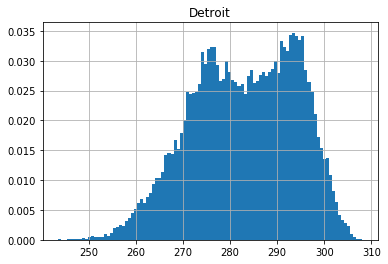

In [ ]:
#histogram
hist = df.hist(density=True,bins=100)
plt.show()

In [ ]:
df.describe()

,Detroit
count,45252.000000
mean,282.971668
std,11.034481
min,243.483333
25%,274.690000
50%,283.540000
75%,292.231250
max,308.050000


In [ ]:
uzorak=df.sample(10)
uzorak.std()['Detroit']  # ddof=1 by default-u in Pandas Data Frame ( numpy default is ddof=0)

11.000642832025054

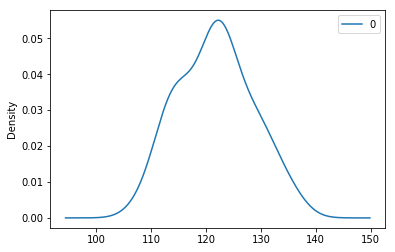

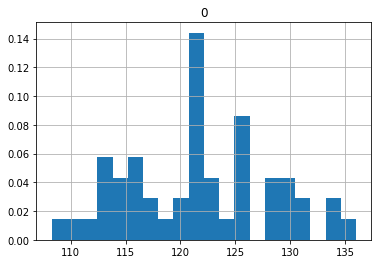

In [ ]:
var_estimators = []

sample_size=500
number_of_estimators=50
for x in range(number_of_estimators):

    sample=df.sample(sample_size)
    var_estimators.append( sample.var()['Detroit'] )


# we plot the estimation of the pdf of the variance estimators
pd.DataFrame(var_estimators).plot(kind="density")

# variance score histogram:
hist = pd.DataFrame(var_estimators).hist(density=True,bins=20)
plt.show()

In [ ]:
# CIs:

alpha=0.05   # 1-alpha=0.95

print(var_estimators[0])


Kvantil1 = stats.chi2.ppf(1-alpha/2, df=sample_size-1)
Kvantil2 = stats.chi2.ppf(alpha/2, df=sample_size-1)


CI = ((sample_size-1)*var_estimators[0]/Kvantil1, (sample_size-1)*var_estimators[0]/Kvantil2)
print(CI)


108.25823726914119
(95.9876841729753, 123.05490603162944)


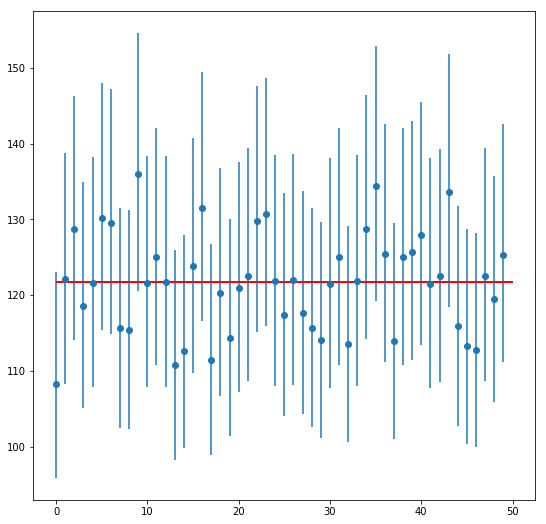

In [ ]:
# we want to plot all the intervals:
CIs=[]
for i in range(0,number_of_estimators):
    CIs.append(((sample_size-1)*var_estimators[i]/Kvantil1, (sample_size-1)*var_estimators[i]/Kvantil2))


plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0, number_of_estimators),
             y=var_estimators[0:number_of_estimators],
             yerr=np.stack((var_estimators-np.array(CIs)[:,0], np.array(CIs)[:,1]-var_estimators)),
             fmt='o')

plt.hlines(xmin=0, xmax=number_of_estimators,
           y=df.var()['Detroit'],
           linewidth=2.0,
           color="red")

plt.show()